# Problem Statement

Credit Card payment default occurs when you fail to pay the Minimum Amount Due (MAD) on the credit card for a few consecutive months. Usually, the default notice is sent by the card issuer after 6 consecutive missed payments.

**Consequences of Credit card payment default**

- Lawful Punishments
- Suspended Credit Card Account
- Detrimental Effect on Credit Score
- High-Interest Rates
- Asset Possession

In this project we classify customers as potential defaulters given personal and 6 months banking details.

## [Medium Article Link](https://medium.com/@sudhanshurastogi/statistical-hypothesis-testing-in-applied-machine-learning-c4952d59dd29)

## [Important Kaggle Notebook](https://www.kaggle.com/code/sudhanshu2198/credit-card-defaulter-prediction)

**Variables**

- **Credit Limit**: Amount of the given credit (in dollars): it includes both the individual consumer credit and his/her family (supplementary) credit
- **Sex** (1=male; 2=female)
- **Education** (1=graduate school; 2=university; 3=high school; 4=other)
- **Marital Status** (1=married; 2=single; 3=others)
- **Age** (years)
- **History of past payment**: The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above
- **Amount of bill statement** (dollars) for past 6 months
- **Amount of previous payment** for the past 6 months

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer,precision_recall_curve,auc,f1_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib.gridspec import GridSpec
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data Summary

In [3]:
data=pd.read_csv('../input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv')

In [4]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE','default.payment.next.month']].describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.0,140000.0,240000.0,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.0,2.0,2.0,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.0,2.0,2.0,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.0,2.0,2.0,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.0,34.0,41.0,79.0
default.payment.next.month,30000.0,0.221200,0.415062,0.0,0.0,0.0,0.0,1.0


In [7]:
data[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe().T

,count,mean,std,min,25%,50%,75%,max
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.0,0.0,0.0,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.0,0.0,0.0,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.0,0.0,0.0,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.0,0.0,0.0,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.0,0.0,0.0,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-1.0,0.0,0.0,8.0


In [8]:
data[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe().T

,count,mean,std,min,25%,50%,75%,max
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
BILL_AMT6,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0


**Any time a negative dollar amount shows up on a credit card balance, it means the bank owes the account holder money. The negative balance will zero out or become a positive balance as the cardholder charges additional purchases.**

In [9]:
data[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe().T

,count,mean,std,min,25%,50%,75%,max
PAY_AMT1,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0
PAY_AMT2,30000.0,5921.163500,23040.870402,0.0,833.00,2009.0,5000.00,1684259.0
PAY_AMT3,30000.0,5225.681500,17606.961470,0.0,390.00,1800.0,4505.00,896040.0
PAY_AMT4,30000.0,4826.076867,15666.159744,0.0,296.00,1500.0,4013.25,621000.0
PAY_AMT5,30000.0,4799.387633,15278.305679,0.0,252.50,1500.0,4031.50,426529.0
PAY_AMT6,30000.0,5215.502567,17777.465775,0.0,117.75,1500.0,4000.00,528666.0


In [10]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

# Data Cleaning

In [11]:
#renaming columns for convenience

data.rename(columns={'default.payment.next.month':'default','PAY_0':'PAY_1'},inplace=True)

#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others)

fil = (data['EDUCATION'] == 5) | (data['EDUCATION'] == 6) | (data['EDUCATION'] == 0)
data.loc[fil, 'EDUCATION'] = 4
data['EDUCATION'].value_counts()

# MARRIAGE: Marital status (1=married, 2=single, 3=others)

data.loc[data['MARRIAGE']==0, 'MARRIAGE'] = 3
data['MARRIAGE'].value_counts()

"""REPAYMENT STATUS: (0=pay duly, 1=payment delay for one month, 2=payment delay for two 
   months, … 8=payment delay for eight months, 9=payment delay for nine months and above)"""

for i in range(1,7):
    col='PAY_'+str(i)
    fil = (data[col] == -2) | (data[col] == -1) 
    data.loc[fil, col] = 0
    
    
"""Very people have LIMIT_BAL greater then 500000.0 around 100, there we will take only
   those instances where LIMIT_BAL is lower then or equal to 500000.0."""

data=data[data["LIMIT_BAL"]<=500000.0]

# Statistical Hypothesis Testing

In [12]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import normaltest
from scipy.stats import friedmanchisquare
from scipy.stats import norm
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

## Chi Independency Test

**The Chi-Squared test is a statistical hypothesis test that assumes (the null hypothesis)
that the observed frequencies for a categorical variable match the expected frequencies
for the categorical variable.**
   
 - **Ho: Variables are independent**
 - **H1: Variables are dependent**

In [13]:
variables=['SEX','EDUCATION','MARRIAGE']
indexs={'SEX':["Male","Female"],
       'EDUCATION':["Graduate School","University","High School","Others"],
       'MARRIAGE':["Married","Single","Others"]}

for var in variables:
    inter=data.groupby(var)[["default"]].agg(['sum','count'])
    default=inter['default']['sum'].values
    Non_default=(inter['default']['count']-inter['default']['sum']).values
    
    contingency_table=pd.DataFrame({"Non-defaulter":Non_default,
                                    "Defaulter":default},
                                    index=indexs[var])
    
    stat, p, dof, expected = chi2_contingency(contingency_table)
    
    expected_table=pd.DataFrame(expected,columns=["Non-defaulter","Defaulter"],
                            index=indexs[var])
    
    print(var,'\n\nObserved Table\n',contingency_table,'\n\nExpected Table\n',expected_table)
    
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('\nProbability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
        
    # interpret p-value
    alpha = 1.0 - prob
    print('\nSignificance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0 null hypothesis)')
    else:
        print('Independent (fail to reject H0 null hypothesis)')
    print("\n","*"*50)

SEX 

Observed Table
         Non-defaulter  Defaulter
Male             8935       2864
Female          14246       3749 

Expected Table
         Non-defaulter    Defaulter
Male      9180.124153  2618.875847
Female   14000.875847  3994.124153

Probability=0.950, critical=3.841, stat=48.625
Dependent (reject H0)

Significance=0.050, p=0.000
Dependent (reject H0 null hypothesis)

 **************************************************
EDUCATION 

Observed Table
                  Non-defaulter  Defaulter
Graduate School           8441       2027
University               10650       3320
High School               3659       1234
Others                     431         32 

Expected Table
                  Non-defaulter    Defaulter
Graduate School    8144.549507  2323.450493
University        10869.254548  3100.745452
High School        3806.962241  1086.037759
Others              360.233705   102.766295

Probability=0.950, critical=7.815, stat=157.083
Dependent (reject H0)

Significance=0.050

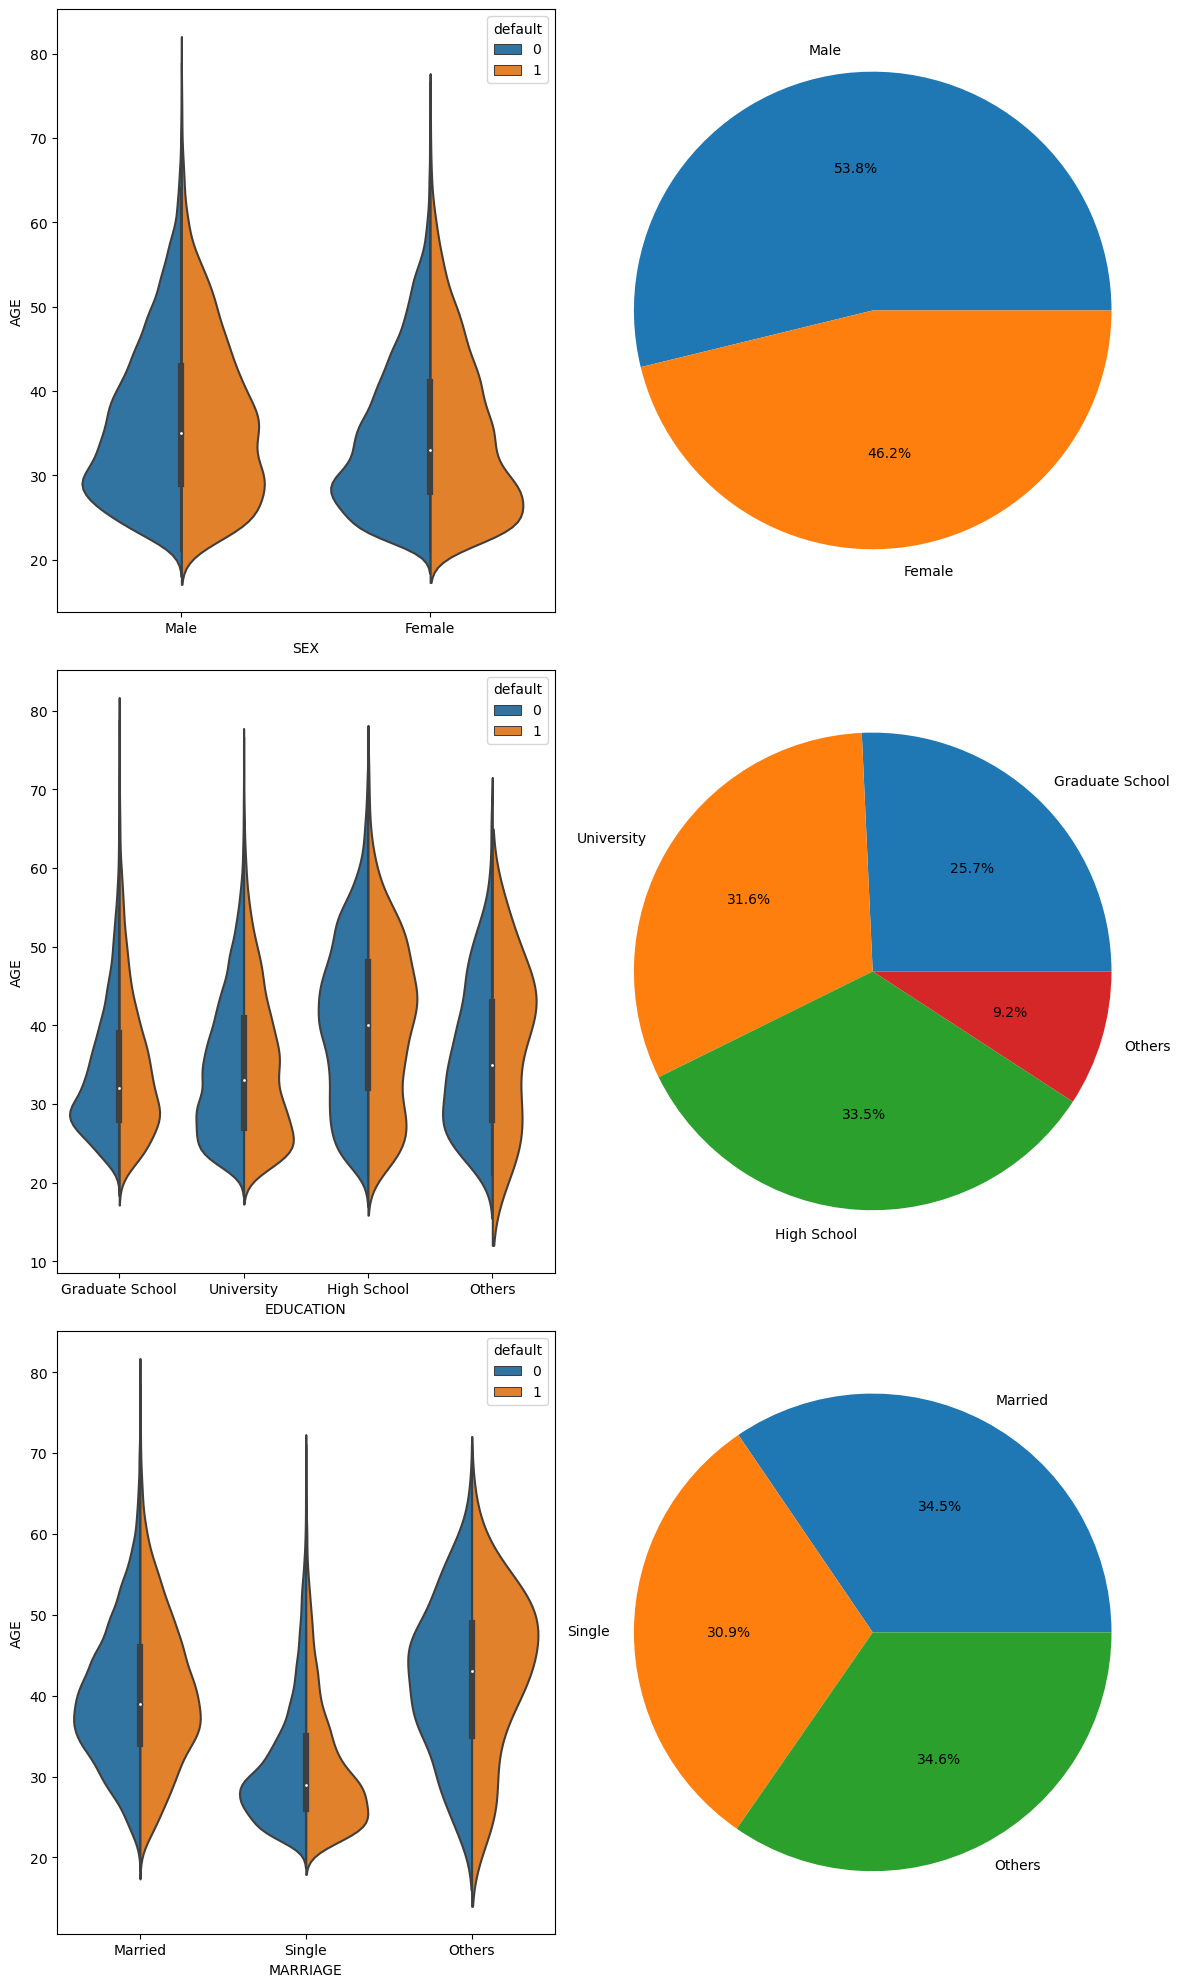

In [14]:
labels={"SEX":{1:"Male",2:"Female"},
        "EDUCATION":{1:"Graduate School",2:"University",3:"High School",4:"Others"},
        "MARRIAGE":{1:"Married",2:"Single",3:"Others"}}

fig,axes=plt.subplots(3,2,figsize=(12,20))
cols=['SEX', 'EDUCATION', 'MARRIAGE']

for i,col in enumerate(cols):
    inter=data.groupby(col)['default'].mean()
    
    sns.violinplot(x=col,y="AGE", hue="default",split=True, data=data,ax=axes[i,0]);
    axes[i,0].set_xticklabels(labels=labels[col].values())
    axes[i,1].pie(inter,labels=labels[col].values(),autopct='%0.1f%%',radius=1.2);
    
plt.tight_layout()
plt.savefig("1.png")

- **The results of chi independence test indicate that the categorical variables and target variables are dependent. Therefore these variables are not redundant.**
- **The Plots indicate that they have weak association with target variable**
- **Women are more susceptible to defaulting then men as can be seen from data 53.8%(female) against 46.2%(male).**
- **Single person has lower defaulting ratio in comparison to married,divorced,live-in  person as they have less expenses and not responsible for family,children.**

## Normality Test

- **An important decision point when working with a sample of data is whether to use parametric or nonparametric statistical methods. Parametric statistical methods assume that the data has a known and specific distribution, often a Gaussian distribution. If a data sample is not Gaussian, then the assumptions of parametric statistical tests are violated and nonparametric statistical methods must be used.**
- **There are a range of techniques that you can use to check if your data sample deviates from a Gaussian distribution, called normality tests.**
  - **If Data Is Gaussian:**
    - **Use Parametric Statistical Methods**
  - **Else:**
    - **Use Nonparametric Statistical Methods**

LIMIT_BAL 

Statistics=2887.508, p=0.000
Sample does not look Gaussian (reject H0)

 **************************************************
AGE 

Statistics=2165.286, p=0.000
Sample does not look Gaussian (reject H0)

 **************************************************
BILL_AMT1 

Statistics=15917.112, p=0.000
Sample does not look Gaussian (reject H0)

 **************************************************
PAY_AMT1 

Statistics=57033.145, p=0.000
Sample does not look Gaussian (reject H0)

 **************************************************


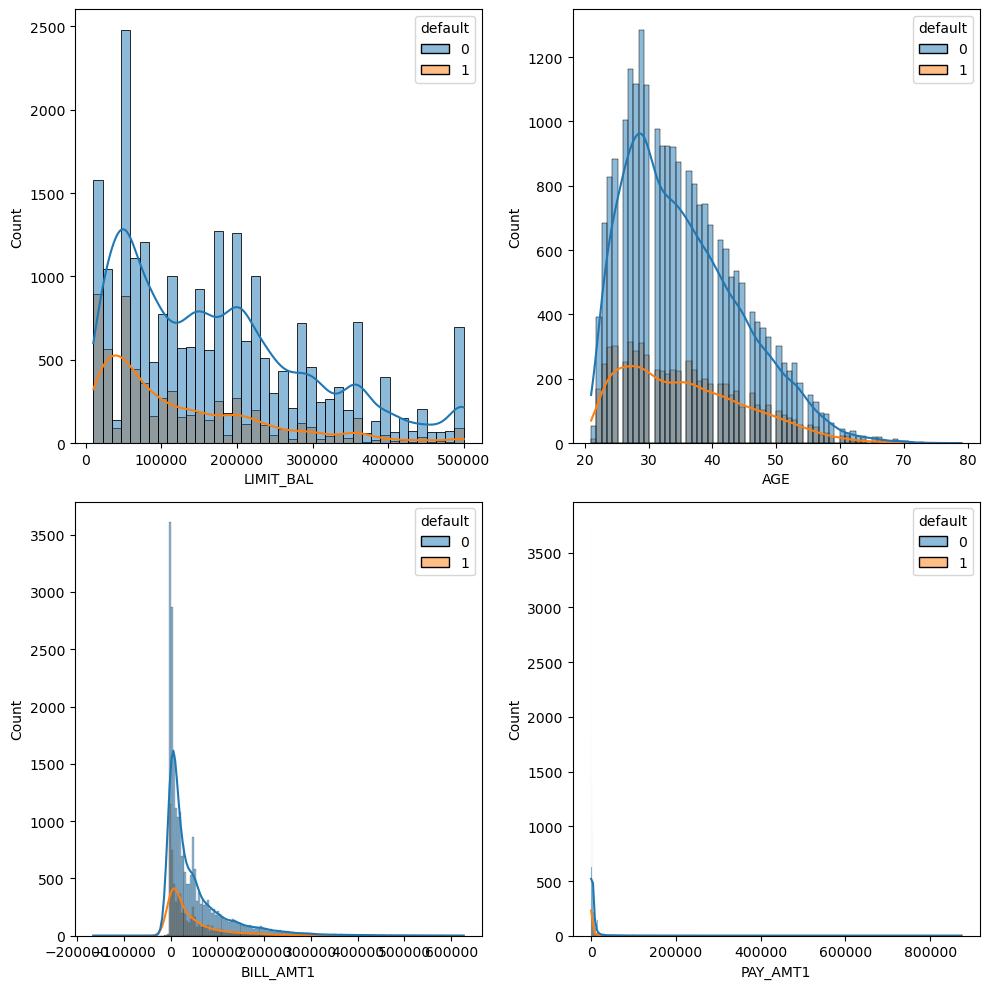

In [15]:
# D'agostino normality test

variables=["LIMIT_BAL","AGE","BILL_AMT1", "PAY_AMT1"]

for var in variables:
    stat, p = normaltest(data[var])
    print(var,'\n')
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
        
    print("\n","*"*50)
    
fig,axes=plt.subplots(2,2,figsize=(10,10))
ax=axes.flatten()

for i,col in enumerate(variables):
    sns.histplot(x=col,hue='default',data=data,kde=True,ax=ax[i]);

plt.tight_layout()
plt.savefig("2.png")

**LIMIT_BAL, BILL_AMT, PAY_AMT variables don't have a gaussian or discrenable distribution, therefore we will treat these variables as non parametric variables and apply non parametric statistical methods**

## Non Parametric Variables

**We have six month data for Bill amount(BILL_AMT), payment amount(PAY_AMT) and payment repayment status(PAY), we want to know if the variables are reduntant (that they provide same information there is no value addition) and irrelavent(they do not affect the target variable)**

1. **We will also check if variables have the same distribution using Friedman test**
   - **The Friedman test is the nonparametric version of the repeated measures analysis of  variance test, or repeated measures ANOVA. The default assumption, or null hypothesis, is that the multiple paired samples have the same distribution. A rejection of the null hypothesis indicates that one or more of the paired samples has a different distribution.**
     - **Fail to Reject H0: Paired sample distributions are equal.**
     - **Rject H0: Paired sample distributions are not equal.**


2. **Then we will check the association between variables**
   - **Rank correlation can be calculated by converting the values for each variable into rank data. This is where the values are ordered and assigned an integer rank value. Rank correlation coeffcients can then be calculated in order to quantify the association between the two ranked variables. Because no distribution for the values is assumed,rank correlation methods are referred to as distribution-free correlation or nonparametric correlation.**
   - **Correlation Strength Interpretation**
     - **0.0 No correlation**
     - **correlation=0.3 Weak correlation**
     - **correlation=0.5 Medium correlation**
     - **correlation=0.7 Strong correlation**

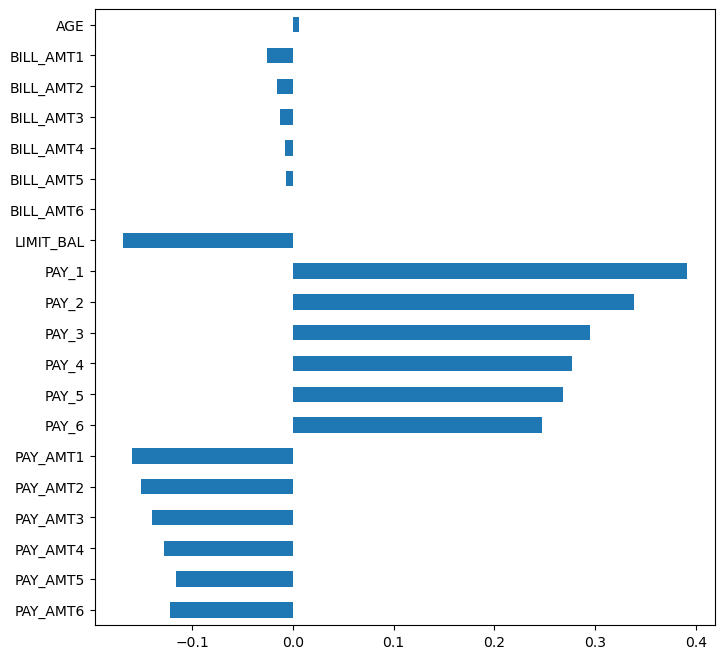

In [16]:
cols=['LIMIT_BAL','AGE','PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
      'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3',
      'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

plt.figure(figsize=(8,8))
inter=data[cols].corrwith(data['default'],method='spearman').sort_index(ascending=False)
inter.plot(kind='barh');
plt.savefig("3.png")

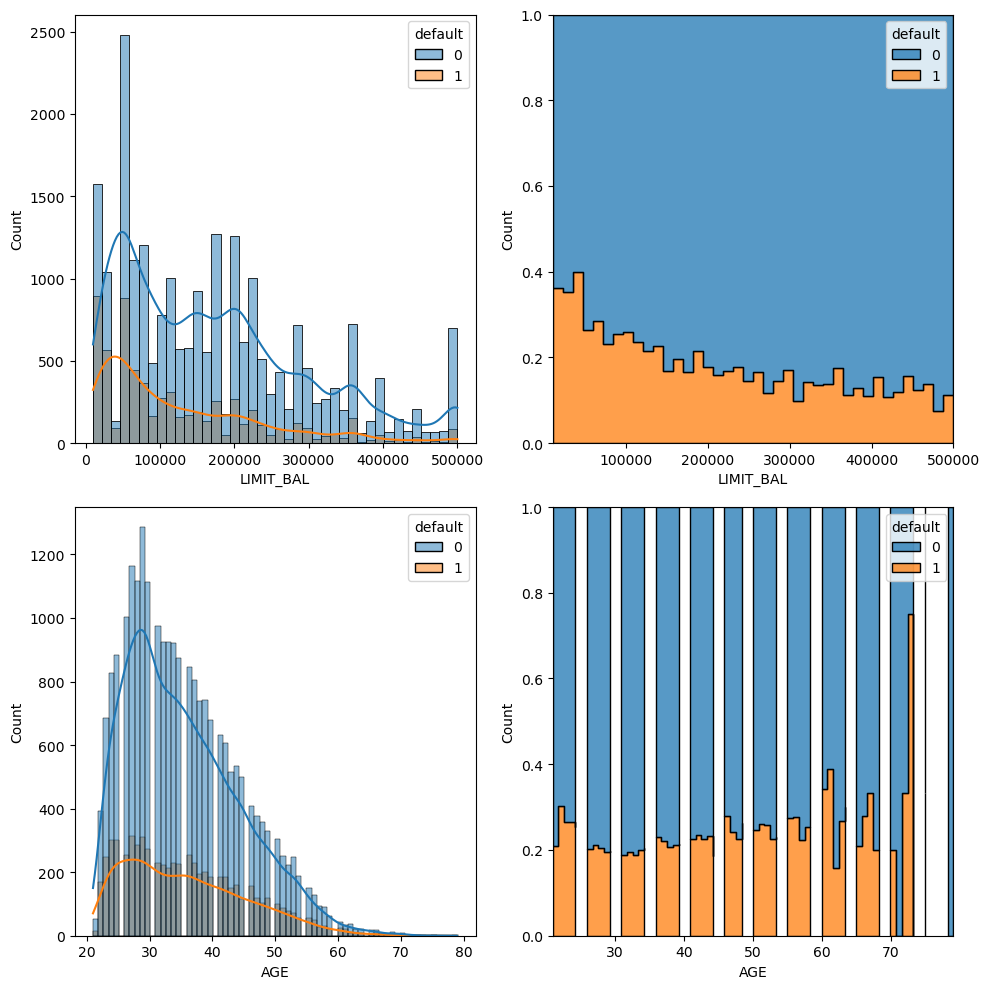

In [17]:
fig,axes=plt.subplots(2,2,figsize=(10,10))
cols=['LIMIT_BAL','AGE']
for i,col in enumerate(cols):
    x=data[col]
        
    sns.histplot(x=x,hue='default',data=data,kde=True,ax=axes[i,0]);
    sns.histplot(x=x,hue='default',data=data,multiple="fill",ax=axes[i,1],element="step");
    
plt.tight_layout()
plt.savefig("4.png")

- **Numerical variable have non-gaussian distribution, therefore we will use power transformer to transform them to gaussian like.**
- **As the LIMIT Balance increases the proportion of defaulters decreases, there is monotonically decreasing ratio of defaulters with increasing LIMIT Balance.**

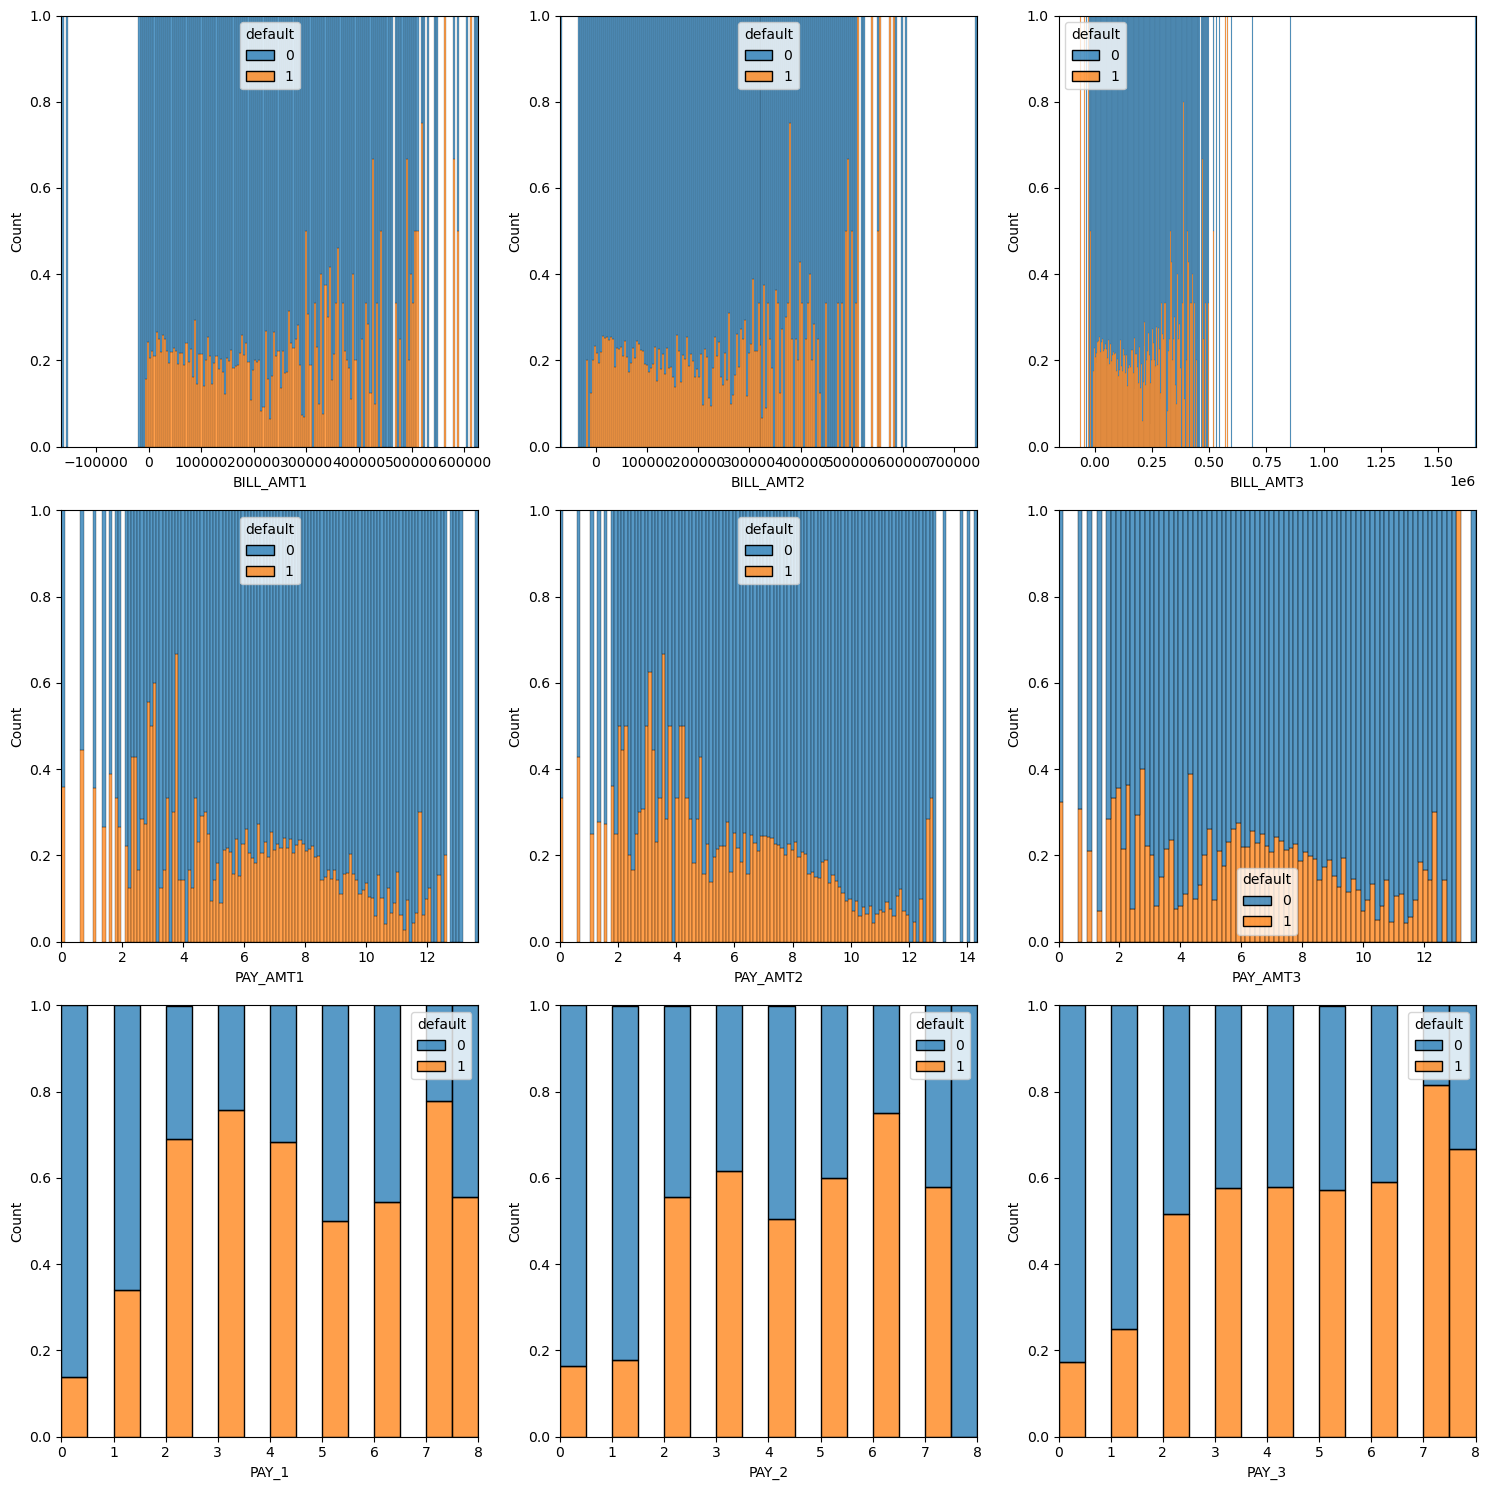

In [18]:
fig,axes=plt.subplots(3,3,figsize=(15,15))
cols=['BILL_AMT', 'PAY_AMT','PAY_']
for i,col in enumerate(cols):
    for j in range(1,4):
        inter=col+str(j)
        if 'PAY_AMT' in inter:
            x=np.log1p(data[inter])
        else:
            x=data[inter]
        
        sns.histplot(x=x,hue='default',data=data,multiple="fill",ax=axes[i,j-1]);
    
plt.tight_layout()
plt.savefig("5.png")

- **When BILL AMOUNT is negative,that means bank owns card holder money, with positive BILL AMOUNT the ratio of defaulters increases with increase in BILL AMOUNT, larger the sum of money to be repayed more will the chances of defaulting.**
- **The Pay (Repayment Status) shows that with one month repayment delay, there is large increase in ratio of card defaulting. The same pattern is exhibited by all Pay variables.**
- **With increasing PAY AMOUNT the ratio of defaulting decreases, as the borrower is rapaying the amount preventing bill amount from accumulating and becoming untenable.**

Statistics=3022.926, p=0.000
Different distributions (reject H0 null hypothesis)




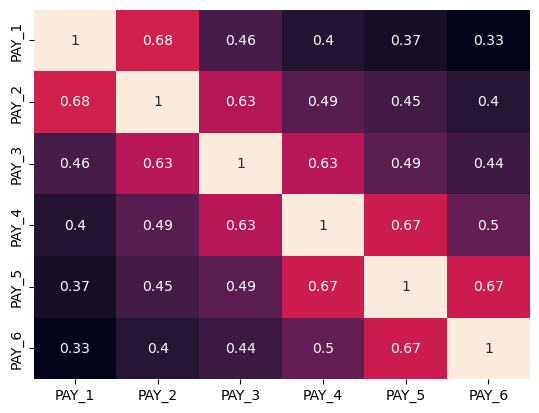

In [19]:
stat, p = friedmanchisquare(data["PAY_1"], data["PAY_2"], data["PAY_3"],
                            data["PAY_4"], data["PAY_5"], data["PAY_6"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0 null hypothesis)\n\n')
else:
    print('Different distributions (reject H0 null hypothesis)\n\n')
    
cols=['PAY_'+str(j) for j in range(1,7)]
sns.heatmap(data[cols].corr(method='spearman'),cbar=False,annot=True);
plt.savefig("6.png")

Statistics=1906.644, p=0.000
Different distributions (reject H0 null hypothesis)




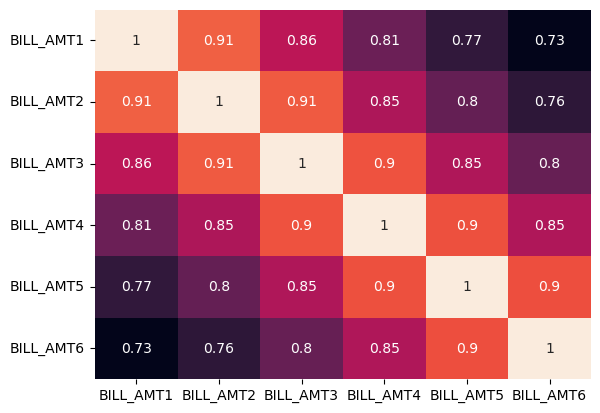

In [20]:
stat, p = friedmanchisquare(data["BILL_AMT1"], data["BILL_AMT2"], data["BILL_AMT3"],
                            data["BILL_AMT4"], data["BILL_AMT5"], data["BILL_AMT6"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0 null hypothesis)\n\n')
else:
    print('Different distributions (reject H0 null hypothesis)\n\n')
    

cols=['BILL_AMT'+str(j) for j in range(1,7)]
sns.heatmap(data[cols].corr(method='spearman'),cbar=False,annot=True);
plt.savefig("7.png")

Statistics=9325.895, p=0.000
Different distributions (reject H0 null hypothesis)




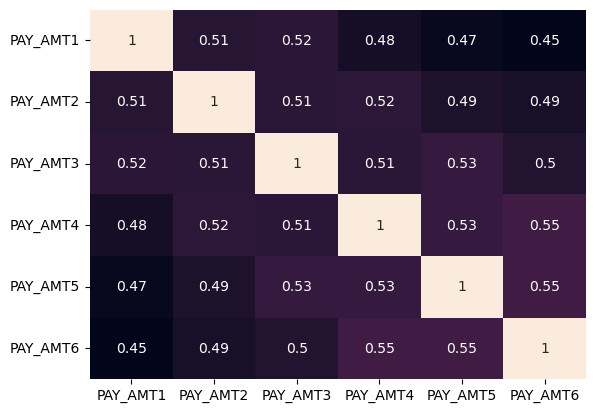

In [21]:
stat, p = friedmanchisquare(data["PAY_AMT1"], data["PAY_AMT2"], data["PAY_AMT3"],
                            data["PAY_AMT4"], data["PAY_AMT5"], data["PAY_AMT6"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0 null hypothesis)\n\n')
else:
    print('Different distributions (reject H0 null hypothesis)\n\n')
    
cols=['PAY_AMT'+str(j) for j in range(1,7)]
sns.heatmap(data[cols].corr(method='spearman'),cbar=False,annot=True);
plt.savefig("8.png")

- **From the barplot we can see that the strength of correlation of Target variable(default) decrases with months, current imformation about variables have more weightage then older months information.**
  - **Many Banks uses card customers 3 month transactions history to determine the whether the customer will defaul or not.**
- **As the variables are non-parametric we cannot use pearson method that assumes gaussian distribution, instead we can use spearman and kendall method that are suitable for non-parametric data.**
- **Bill_AMT variables are highly correlated, as the Bill_AMT depends on previous money owned plus money drawn present month due to which it has string correlation with previous month Bill_AMT.**
- **PAY_AMT and PAY variables medium strength of correlation.**
- **Strong correlation results in multi collinearity, can affects the interpretation of models**
- **As verified by friedmann test, Bill_AMT, PAY and PAY_AMT have different distributions,That means they are highly correlated but differnt variables, we will use all of them**

# Data Preprocessing

In [22]:
# converting age into categorical variable

data['AGE']=pd.cut(data['AGE'],bins=range(20,85,5),labels=range(len(range(20,85,5))-1))

X=data.drop(['ID','default'],axis=1)
y=data['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

numeric_col=['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4',
             'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
             'PAY_AMT5', 'PAY_AMT6']

categorical_col=['SEX','AGE', 'EDUCATION', 'MARRIAGE', 'PAY_1',
                 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

transformer=ColumnTransformer([('scaled',RobustScaler(),numeric_col)],remainder='passthrough')
transformer.fit(X_train)

columns=numeric_col+categorical_col
X_train=pd.DataFrame(transformer.transform(X_train),columns=columns)
X_test=pd.DataFrame(transformer.transform(X_test),columns=columns)

# Algorithm Spot Checking

## Model Skill Comparison

- **Law of Large Numbers** 
  - **The law of large numbers is a theorem that suggests that the average result from repeating an experiment multiple times will better approximate the true or expected underlying result.**
- **Central Limit Theorem** 
  - **The theorem states that as the size of the sample increases, the distribution of the mean across multiple samples will approximate a Gaussian distribution.**
  - **If we calculate the mean of a sample, it will be an estimate of the mean of the population distribution. But, like any estimate, it will be wrong and will contain some error. If we draw multiple independent samples, and calculate their means, the distribution of those means will form a Gaussian distribution irrespective of shape of the population distribution from which we are drawing samples.**
  
- **Application of above laws in applied machine learning**
  - **Instead of getting a single estimate of model performance we should get multiple estimate of model performances, and according to Law of Large Numbers, the average of these estimates will be a better estimate of model perofrmance.**
  - **The Average will still contain error, we can quantify the uncertainity of model performance skill by using central limit theorem, calculating the confidence interval from gaussian distribution.**
  - **Anova Test could be used to determine whether the different model performances scores have different or same distribution**
    - **ANOVA is a statistical test that assumes that the mean across 2 or more groups are equal. If the evidence suggests that this is not the case, the null hypothesis is rejected and at least one data sample has a different distribution**
    - **Then using Cohen d statistics we can quantify the difference in distribution's mean in terms of standard deviation.**

In [23]:
def get_models():
    
    models,names=[],[]
    
    models.append(LogisticRegression(random_state=42,n_jobs=-1))
    names.append('lr')
    
    models.append(KNeighborsClassifier(n_jobs=-1))
    names.append('knn')
    
    models.append(RandomForestClassifier(random_state=42,n_jobs=-1))
    names.append('rfc')
    
    models.append(XGBClassifier(random_state=42,n_jobs=-1))
    names.append('xgb')
    
    models.append(LGBMClassifier(random_state=42,n_jobs=-1))
    names.append('lgb')
    
    return names, models

In [24]:
results=[]
def evaluate(X,y,names,models):
    for i in range(len(models)):
        cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=100, random_state=1)
        scores=cross_val_score(models[i],X_train,y_train,scoring="roc_auc",cv=cv,n_jobs=-1)
        results.append(scores)
        
    plt.boxplot(results,labels=names,showmeans=True);

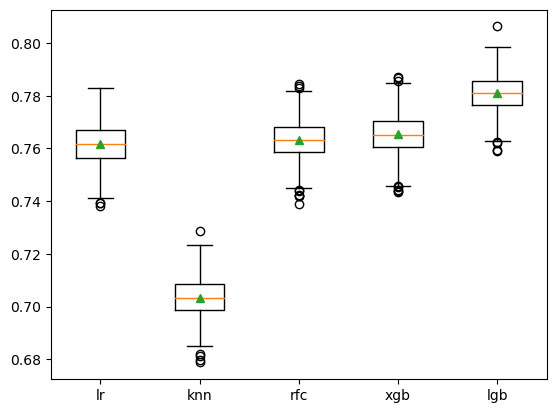

In [25]:
names, models=get_models()
evaluate(X_train,y_train,names,models)

lr mean is 0.7618698580217433 with confidence interval0.7610701678415218-0.7626695482019649

knn mean is 0.7033648627642056 with confidence interval0.6997231475657804-0.7070065779626309

rfc mean is 0.7632192357933828 with confidence interval0.7603460214219404-0.7660924501648252

xgb mean is 0.7653568874769948 with confidence interval0.7618002054424529-0.7689135695115368

lgb mean is 0.780958597362671 with confidence interval0.7784716249275189-0.7834455697978232



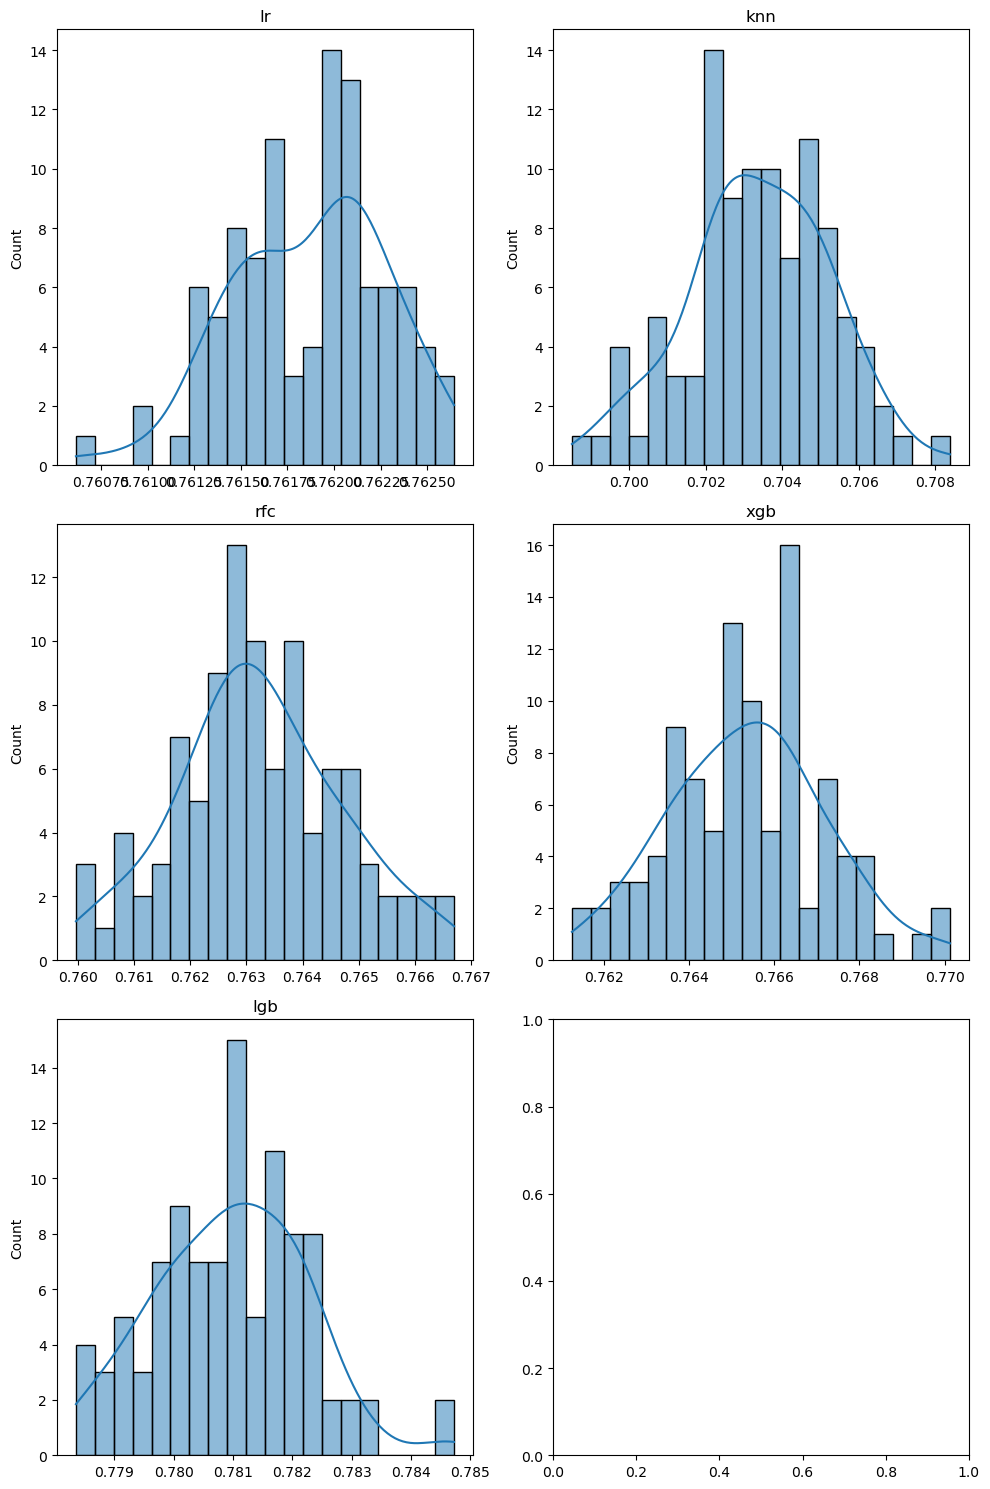

In [26]:
fig,axes=plt.subplots(3,2,figsize=(10,15))
ax=axes.flatten()

for i in range(5):
    inter=[np.mean(results[i][j:j+5]) for j in range(0,500,5)]
    
    mean=np.mean(inter)
    std=np.std(inter)
    #Middle 95%
    distance=norm.ppf(0.975)
    lower=mean-distance*std
    upper=mean+distance*std
    
    sns.histplot(inter,ax=ax[i],kde=True,bins=20);
    print(f"{names[i]} mean is {mean} with confidence interval{lower}-{upper}\n")
    ax[i].set_title(names[i]);
    
plt.tight_layout()
plt.savefig("10.png")

In [27]:
# Anova Test

stat, p = f_oneway(results[0],results[1],results[2],
                   results[3],results[4])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=7666.779, p=0.000
Different distributions (reject H0)


## Calculate Difference Effect Size
- **Cohen's d measures the difference between the mean from two Gaussian-distributed variables. It is a standard score that summarizes the difference in terms of the number of standard deviations.**
  - **Small Effect Size: d=0.20**
  - **Medium Effect Size: d=0.50**
  - **Large Effect Size: d=0.80**

In [28]:
def cohend(d1, d2):
    
    # calculate the pooled standard deviation
    n1, n2 = len(d1), len(d2)
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    
    # calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)
    
    # calculate the effect size
    return np.abs((u1 - u2)) / s

In [29]:
"""While Anova test tells us probability of all samples drawn from same distribution 
   given null hypothesis.
   We will T Test to check if xgb and lightgbm predictions have same or different 
   distributions  and cohen d statistics to quantify the difference."""

data1=results[3]
data2=results[4]

stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')
    
effect_size=cohend(data1, data2)
print(f'difference effect size in means between xgboost and lightgbm: {effect_size}')

Statistics=-33.135, p=0.000
Different distributions (reject H0)
difference effect size in means between xgboost and lightgbm: 2.0956326713465803


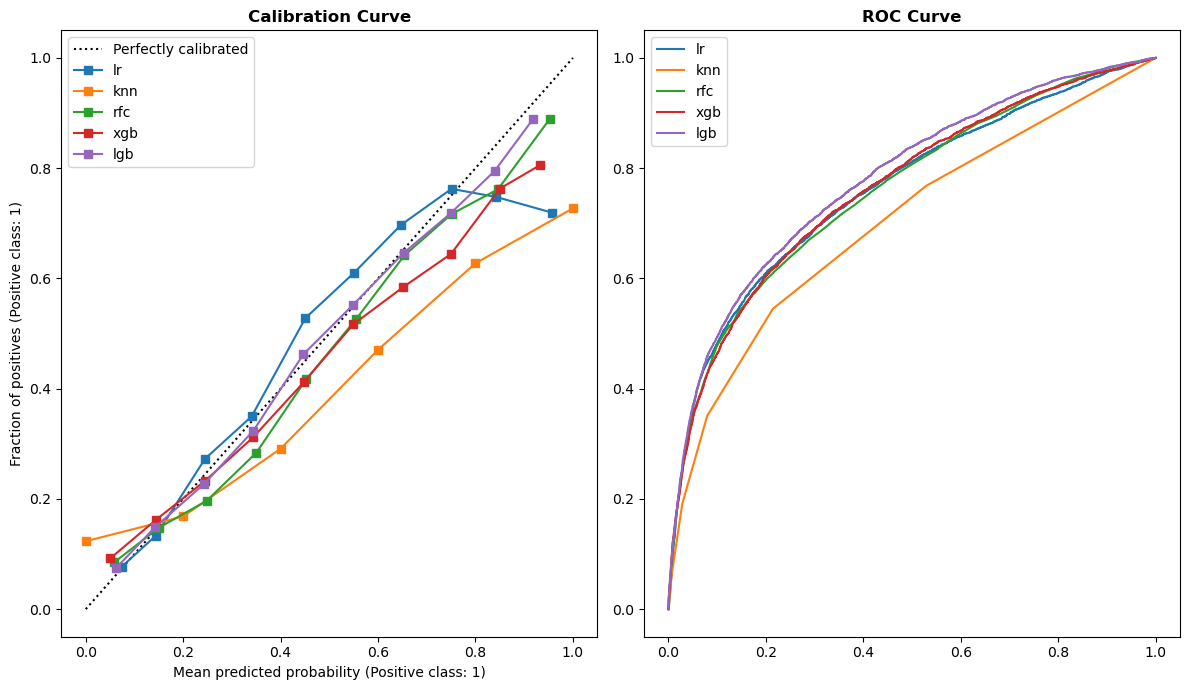

In [30]:
names,models=get_models()
fig,axes=plt.subplots(1,2,figsize=(12,7))

for i in range(len(models)):
    importance=[]
    probability=pd.Series()
    
    for train_idx,val_idx in StratifiedKFold(n_splits=5,shuffle=True, random_state=42).split(X_train,y_train):
        model=models[i].fit(X_train.iloc[train_idx,:],y_train.iloc[train_idx])
        y_proba=model.predict_proba(X_train.iloc[val_idx,:])[:,1]
    
        inter=pd.Series(data=y_proba,index=val_idx)
        probability=pd.concat([probability,inter])
        
    y_proba=probability.sort_index().values
    y_true=y_train
    
    ax=axes[0]
    CalibrationDisplay.from_predictions(y_true,y_proba,n_bins=10,ax=ax,name=names[i]);
        
    ax=axes[1]
    fpr,tpr,thresh=roc_curve(y_true,y_proba)
    ax.plot(fpr,tpr,label=names[i])
            
axes[0].set_title(f"Calibration Curve",fontweight="bold")
axes[0].legend()
axes[1].set_title(f"ROC Curve",fontweight="bold")
axes[1].legend()
plt.tight_layout()

- **LightGBM performs best among other models.**
- **KNNClassifier performs poorly and is highly underconfident for predicting positive class.**
- **LightGBM,XGB,Random Forest, Logistic Regression classifiers have learned the underlying structure but are underconfident with high probabilities, therefore there performance can be increased by using probabaility calibration.**